https://www.kaggle.com/benroshan/factors-affecting-campus-placement

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

sl_no: Serial Number
ssc_p: Secondary Education percentage- 10th Grade
ssc_b: Board of Education- Central/ Others
hsc_p: Higher Secondary Education percentage- 12th Grade
hsc_b: Board of Education- Central/ Others
hsc_s: Specialization in Higher Secondary Education
degree_p: Degree Percentage-final average percentage score of                      Undergraduate course
degree_t: Under Graduation(Degree type)- Field of degree education
workex: Work Experience
etest_p: Employability test percentage ( conducted by college)
specialisation: Post Graduation(MBA)- Specialization
mba_p: MBA percentage-- final average percentage score of Masters degree(Post Graduation) in business administration course
status: Status of placement- Placed/Not placed

Question: 
Which factor influenced a candidate in getting placed?

In [102]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn import svm, datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline

from sklearn.model_selection import GridSearchCV

# Explore the data

In [277]:
df = pd.read_csv(r'C:\Users\ojiang1\Desktop\Data Science\Capstone2_Supervised learning\PlacementDataFullClass.csv')

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [140]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [142]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [106]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [107]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

the data looks pretty good that only salary has null values.

this affect my question asked earlier-instead of asking:
Which factor influenced a candidate's salary?
i would rather ask:
Which factor influenced a candidate in getting placed?

i will drop salary in the original data set, since it does not affect status.

In [171]:
df=df.drop(['salary'],1)
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

In [132]:
# Numeric Columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')
The number of numerical columns is 6


In [133]:
# NON-Numeric Columns
non_numeric_columns = df.select_dtypes(['object']).columns
non_numeric_columns
len(non_numeric_columns)
non_numeric_columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2172E62E8>,
      dtype=object)

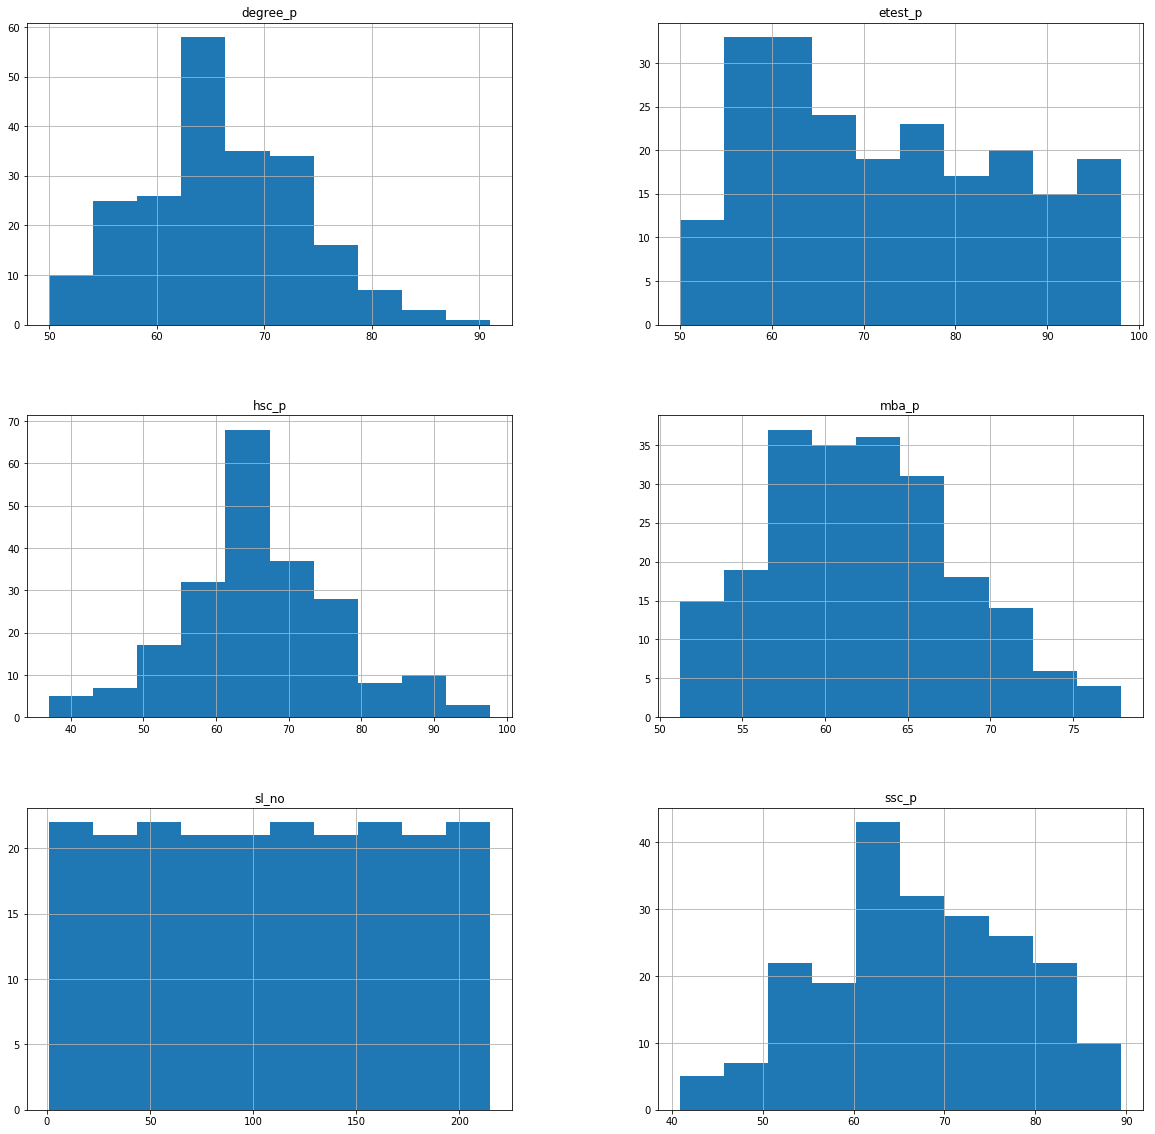

In [37]:
# lets take a visual look using histgram
df.hist(figsize=(20,20))

In [111]:
# outliars

for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val) 
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) | 
                                                    (df[col] < min_val))[0]))*100/215))
    
# two variables has outliars, this might effect the model performance later.

Number of outliers for sl_no is: 0 and it is 0.0 percent.
Number of outliers for ssc_p is: 0 and it is 0.0 percent.
Number of outliers for hsc_p is: 8 and it is 3.7209302325581395 percent.
Number of outliers for degree_p is: 1 and it is 0.46511627906976744 percent.
Number of outliers for etest_p is: 0 and it is 0.0 percent.
Number of outliers for mba_p is: 0 and it is 0.0 percent.


Text(0.5, 1.0, 'mba_p')

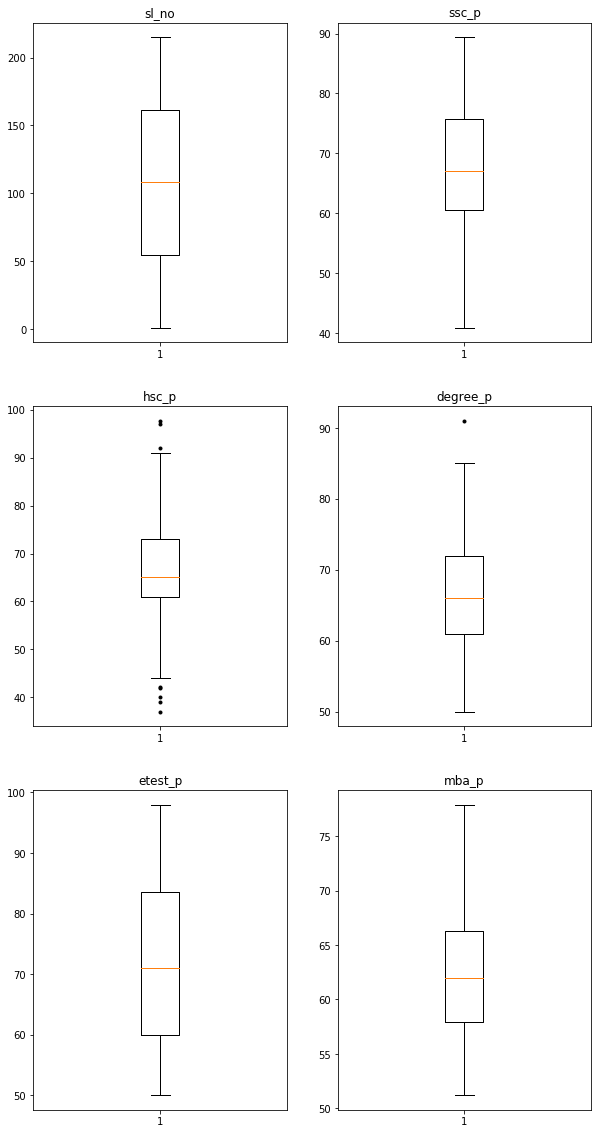

In [40]:
fig = plt.figure(figsize=(10,20))

plt.subplot(3, 2, 1)
plt.boxplot(df["sl_no"], sym='k.')
plt.title("sl_no")

plt.subplot(3, 2, 2)
plt.boxplot(df["ssc_p"], sym='k.')
plt.title("ssc_p")

plt.subplot(3, 2, 3)
plt.boxplot(df["hsc_p"], sym='k.')
plt.title("hsc_p")

plt.subplot(3, 2, 4)
plt.boxplot(df["degree_p"], sym='k.')
plt.title("degree_p")

plt.subplot(3, 2, 5)
plt.boxplot(df["etest_p"], sym='k.')
plt.title("etest_p")

plt.subplot(3, 2, 6)
plt.boxplot(df["mba_p"], sym='k.')
plt.title("mba_p")

In [112]:
features = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
      'status']
len(features)


14

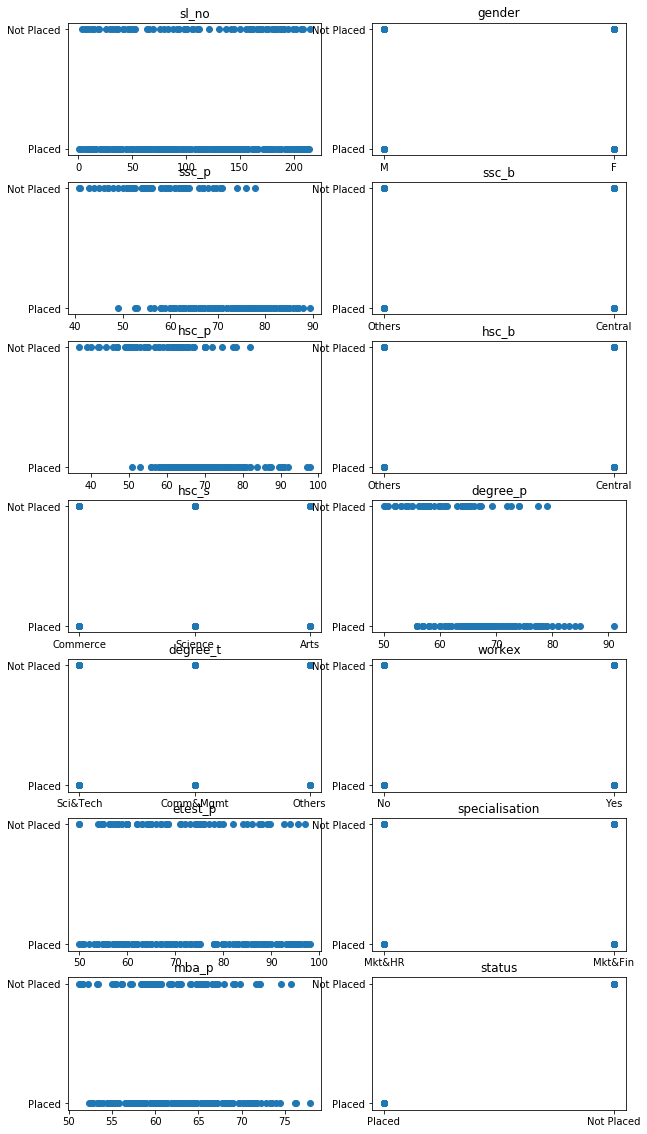

In [113]:
## now use the scaterplot to see the relationships between features and target


plt.figure(figsize=(10,20))

for i in range(len(features)):
    plt.subplot(7,2,i+1)
    plt.scatter(df[features[i]],y=df['status'])
    plt.title(features[i])

plt.show()


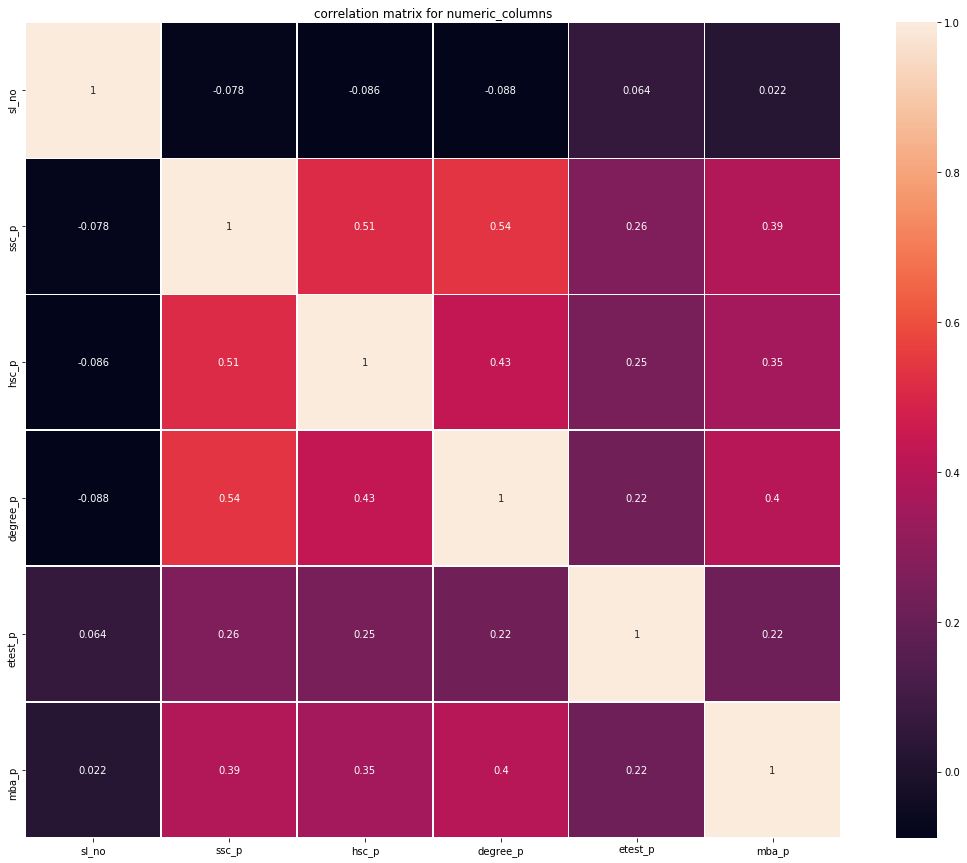

In [114]:
# heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df[numeric_columns].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for numeric_columns")
plt.show()

In [60]:
df[numeric_columns].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000


In [172]:
# transfer non numerical to dummies
non_numeric_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation','status']



# Encode character string categorical data into numeric data using one hot encoding
df = pd.concat([df, pd.get_dummies(df["gender"], prefix="Gender", drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["ssc_b"], prefix="Ssc_b",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["hsc_b"], prefix="Hsc_b",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["hsc_s"], prefix="Hsc_s",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["degree_t"], prefix="Ddegree_t",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["workex"], prefix="Workex",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["specialisation"], prefix="Specialisation",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["status"], prefix="Status",drop_first=True)], axis=1)

# drop the character columns
df.drop(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation','status'], axis = 1, inplace = True)

df.info()
df.head(10)
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sl_no                  215 non-null    int64  
 1   ssc_p                  215 non-null    float64
 2   hsc_p                  215 non-null    float64
 3   degree_p               215 non-null    float64
 4   etest_p                215 non-null    float64
 5   mba_p                  215 non-null    float64
 6   Gender_M               215 non-null    uint8  
 7   Ssc_b_Others           215 non-null    uint8  
 8   Hsc_b_Others           215 non-null    uint8  
 9   Hsc_s_Commerce         215 non-null    uint8  
 10  Hsc_s_Science          215 non-null    uint8  
 11  Ddegree_t_Others       215 non-null    uint8  
 12  Ddegree_t_Sci&Tech     215 non-null    uint8  
 13  Workex_Yes             215 non-null    uint8  
 14  Specialisation_Mkt&HR  215 non-null    uint8  
 15  Status

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'Gender_M',
       'Ssc_b_Others', 'Hsc_b_Others', 'Hsc_s_Commerce', 'Hsc_s_Science',
       'Ddegree_t_Others', 'Ddegree_t_Sci&Tech', 'Workex_Yes',
       'Specialisation_Mkt&HR', 'Status_Placed'],
      dtype='object')

In [191]:
Y=df.Status_Placed 
X=df[['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'Gender_M',
       'Ssc_b_Others', 'Hsc_b_Others', 'Hsc_s_Commerce', 'Hsc_s_Science',
       'Ddegree_t_Others', 'Ddegree_t_Sci&Tech', 'Workex_Yes',
       'Specialisation_Mkt&HR']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sl_no                  215 non-null    int64  
 1   ssc_p                  215 non-null    float64
 2   hsc_p                  215 non-null    float64
 3   degree_p               215 non-null    float64
 4   etest_p                215 non-null    float64
 5   mba_p                  215 non-null    float64
 6   Gender_M               215 non-null    uint8  
 7   Ssc_b_Others           215 non-null    uint8  
 8   Hsc_b_Others           215 non-null    uint8  
 9   Hsc_s_Commerce         215 non-null    uint8  
 10  Hsc_s_Science          215 non-null    uint8  
 11  Ddegree_t_Others       215 non-null    uint8  
 12  Ddegree_t_Sci&Tech     215 non-null    uint8  
 13  Workex_Yes             215 non-null    uint8  
 14  Specialisation_Mkt&HR  215 non-null    uint8  
dtypes: flo

# PCA


In [186]:
# now apple PCA to above features X,Y

standardscalar=StandardScaler()
x_scaler=standardscalar.fit_transform(X)

sklearn_pca = PCA(n_components=11)   
df["pca_1"] = sklearn_pca.fit_transform(x_scaler)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# More than 86% of the total variance is explained by the first 11 principal components.
# not very effective

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.18587501 0.17282535 0.10703333 0.08885811 0.07810718 0.0642666
 0.06305276 0.05165602 0.04415746 0.03678692 0.03044044]


In [190]:
df[['Status_Placed' ,"pca_1", 'sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'Gender_M',
       'Ssc_b_Others', 'Hsc_b_Others', 'Hsc_s_Commerce', 'Hsc_s_Science',
       'Ddegree_t_Others', 'Ddegree_t_Sci&Tech', 'Workex_Yes',
       'Specialisation_Mkt&HR','Status_Placed' ]].corr()

# the corr are low, which means pca is not working well. 


,Status_Placed,pca_1,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,Gender_M,Ssc_b_Others,Hsc_b_Others,Hsc_s_Commerce,Hsc_s_Science,Ddegree_t_Others,Ddegree_t_Sci&Tech,Workex_Yes,Specialisation_Mkt&HR,Status_Placed
Status_Placed,1.000000,0.472433,-0.026859,0.607889,0.491228,0.479861,0.127639,0.076922,0.090670,0.037297,0.016945,0.024414,0.007279,-0.117232,0.008688,0.276060,-0.250655,1.000000
pca_1,0.472433,1.000000,-0.045916,0.768897,0.496494,0.700129,0.406813,0.616895,-0.105546,0.186171,0.235272,-0.389240,0.461417,-0.152038,0.507372,0.306194,-0.268718,0.472433
sl_no,-0.026859,-0.045916,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.074306,0.027214,0.116887,-0.024463,0.018201,0.066666,0.009069,0.059151,0.046630,-0.026859
ssc_p,0.607889,0.768897,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,-0.068969,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,0.175675,-0.172536,0.607889
hsc_p,0.491228,0.496494,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,-0.021334,-0.137013,-0.019548,0.258093,-0.226675,-0.131382,-0.053599,0.141025,-0.241630,0.491228
degree_p,0.479861,0.700129,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.173217,0.038070,0.067229,-0.022724,0.092006,-0.180408,0.123477,0.122648,-0.218286,0.479861
etest_p,0.127639,0.406813,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.084294,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,0.056735,-0.236315,0.127639
mba_p,0.076922,0.616895,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,-0.300531,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,0.168811,-0.105728,0.076922
Gender_M,0.090670,-0.105546,0.074306,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,1.000000,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,0.085153,-0.106160,0.090670
Ssc_b_Others,0.037297,0.186171,0.027214,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.019429,1.000000,0.605883,-0.056671,0.058505,-0.002758,0.101060,-0.040744,-0.051565,0.037297


# Model prep

In [192]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [210]:
# define result

def print_result(model, X_test, y_test):
    
    y_pred = model.predict(X_test) #prediction
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred) 
    precision = precision_score(y_test, y_pred)
    score = cross_val_score(model, X_train,y_train, cv=5)

    
    conf_mat = metrics.confusion_matrix(y_test, y_pred)
    conf_mat_df = pd.DataFrame(conf_mat, 
                               index= ['true_yes', 'true_no'],
                              columns = ['predict_yes', 'predict_no'])   
    print('train_score:%.3f'%train_score)
    print('test_score:%.3f'%test_score)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('Cross validation Score is ', score.mean())
    print('Confusion Matrix:', end='\n')
    print(conf_mat_df, end='\n\n')

# 1. Logistic Regression


In [212]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2')
lr.fit(X_train, y_train)

print_result(lr, X_test, y_test)

C:\Users\ojiang1\Documents\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train_score:0.907
test_score:0.814
accuracy:0.814
recall:0.818
precision:0.931
Cross validation Score is  0.8603361344537814
Confusion Matrix:
          predict_yes  predict_no
true_yes            8           2
true_no             6          27



# 2. KNN

In [213]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print_result(knn, X_test, y_test)

train_score:0.843
test_score:0.814
accuracy:0.814
recall:0.909
precision:0.857
Cross validation Score is  0.733109243697479
Confusion Matrix:
          predict_yes  predict_no
true_yes            5           5
true_no             3          30



In [214]:
# find best param

param_grid = {'n_neighbors':[3, 5, 7, 9, 15], 
                'weights':['uniform', 'distance']
               }

CV_rfc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'n_neighbors': 15, 'weights': 'distance'}


In [215]:
# now fit the result from above to KNN 
knn = KNeighborsClassifier(n_neighbors=15, weights = 'distance')
knn.fit(X_train,y_train)

print_result(knn, X_test, y_test)

train_score:1.000
test_score:0.837
accuracy:0.837
recall:0.939
precision:0.861
Cross validation Score is  0.7910924369747898
Confusion Matrix:
          predict_yes  predict_no
true_yes            5           5
true_no             2          31



# 3. Decision Tree

In [216]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

print_result(decision_tree, X_test, y_test)


train_score:0.802
test_score:0.558
accuracy:0.558
recall:0.667
precision:0.733
Cross validation Score is  0.7149579831932773
Confusion Matrix:
          predict_yes  predict_no
true_yes            2           8
true_no            11          22



In [219]:
# find best param

param_grid = {'max_depth':[3, 5, 7, 9, 15, 20],'max_features':[1,5,9,15]}

CV_rfc = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 15, 'max_features': 9}


In [220]:
# now fit the result from above to the model

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=9,
    max_depth=20,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

print_result(decision_tree, X_test, y_test)


train_score:1.000
test_score:0.698
accuracy:0.698
recall:0.818
precision:0.794
Cross validation Score is  0.7959663865546218
Confusion Matrix:
          predict_yes  predict_no
true_yes            3           7
true_no             6          27



# 4. Random forest

In [221]:
rfc = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 456)
rfc.fit(X_train,y_train)

print_result(rfc, X_test, y_test)

train_score:1.000
test_score:0.814
accuracy:0.814
recall:0.879
precision:0.879
Cross validation Score is  0.8660504201680672
Confusion Matrix:
          predict_yes  predict_no
true_yes            6           4
true_no             4          29



# 5. Gradient Boosting

In [222]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print_result(clf, X_test, y_test)

train_score:1.000
test_score:0.860
accuracy:0.860
recall:0.879
precision:0.935
Cross validation Score is  0.8603361344537814
Confusion Matrix:
          predict_yes  predict_no
true_yes            8           2
true_no             4          29



In [224]:
# find best param

param_grid = {'n_estimators':[500, 100, 700,1000], 
                'learning_rate':[0.001, 0.05, 0.1, 0.2],
               'max_depth':[3, 5, 7, 9, 15, 20],
               }

CV_rfc = GridSearchCV(estimator=ensemble.GradientBoostingClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}


In [225]:
# now fit the result from above to the model

params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance',
         'learning_rate': 0.2}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print_result(clf, X_test, y_test)

train_score:1.000
test_score:0.860
accuracy:0.860
recall:0.848
precision:0.966
Cross validation Score is  0.8484033613445379
Confusion Matrix:
          predict_yes  predict_no
true_yes            9           1
true_no             5          28



# Choose best performer


In [226]:
print('Logistic Regression Classifier\n')
print_result(lr, X_test, y_test)
print('KNN\n')
print_result(knn, X_test, y_test)
print('Decision Tree\n')
print_result(decision_tree, X_test, y_test)
print('Random Forest\n')
print_result(rfc, X_test, y_test) 
print('Gradient Boosting\n')        
print_result(clf, X_test, y_test)


Logistic Regression Classifier

train_score:0.907
test_score:0.814
accuracy:0.814
recall:0.818
precision:0.931
Cross validation Score is  0.8603361344537814
Confusion Matrix:
          predict_yes  predict_no
true_yes            8           2
true_no             6          27

KNN

train_score:1.000
test_score:0.837
accuracy:0.837
recall:0.939
precision:0.861
Cross validation Score is  0.7910924369747898
Confusion Matrix:
          predict_yes  predict_no
true_yes            5           5
true_no             2          31

Decision Tree

train_score:1.000
test_score:0.698
accuracy:0.698
recall:0.818
precision:0.794
Cross validation Score is  0.7959663865546218
Confusion Matrix:
          predict_yes  predict_no
true_yes            3           7
true_no             6          27

Random Forest

train_score:1.000
test_score:0.814
accuracy:0.814
recall:0.879
precision:0.879
Cross validation Score is  0.8660504201680672
Confusion Matrix:
          predict_yes  predict_no
true_yes          

Logistic Regression Classifier is the best performer due to:
1. smaller diff of train score and test score, meaning less overfit
2. higher cross validation score, meaning the model is more efficient
3. high accuracy, recall, and precision score

# Feature importance
We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

In [258]:
importance = lr.coef_[0]

for i,v in enumerate(importance,1):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 1, Score: 0.00716
Feature: 2, Score: 0.23716
Feature: 3, Score: 0.09685
Feature: 4, Score: 0.25123
Feature: 5, Score: -0.02964
Feature: 6, Score: -0.18455
Feature: 7, Score: 1.39970
Feature: 8, Score: 0.31514
Feature: 9, Score: 0.40483
Feature: 10, Score: -0.18649
Feature: 11, Score: -0.23780
Feature: 12, Score: -0.32355
Feature: 13, Score: -1.09184
Feature: 14, Score: 1.36577
Feature: 15, Score: -0.36743


In [268]:
df_lr_feature_importance=pd.DataFrame() 

df_lr_feature_importance['feature_name'] = X.columns
df_lr_feature_importance['importance']=importance

df_lr_feature_importance

,feature_name,importance
0,sl_no,0.007158
1,ssc_p,0.237158
2,hsc_p,0.096855
3,degree_p,0.251234
4,etest_p,-0.029639
5,mba_p,-0.184551
6,Gender_M,1.399705
7,Ssc_b_Others,0.315141
8,Hsc_b_Others,0.404832
9,Hsc_s_Commerce,-0.186485


In [269]:
df_lr_feature_importance.sort_values(by ='importance', ascending=False, inplace=True)
df_lr_feature_importance

,feature_name,importance
6,Gender_M,1.399705
13,Workex_Yes,1.365766
8,Hsc_b_Others,0.404832
7,Ssc_b_Others,0.315141
3,degree_p,0.251234
1,ssc_p,0.237158
2,hsc_p,0.096855
0,sl_no,0.007158
4,etest_p,-0.029639
5,mba_p,-0.184551


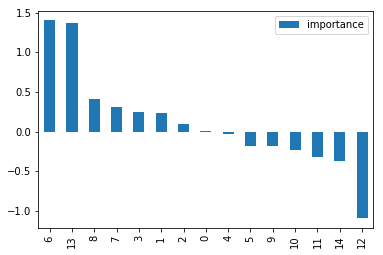

In [270]:
df_lr_feature_importance.plot(kind='bar')

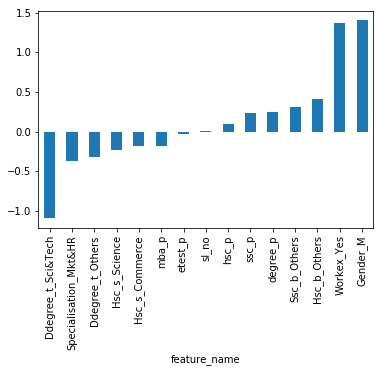

In [272]:
df_lr_feature_importance.groupby('feature_name').importance.mean().sort_values().plot(kind='bar')

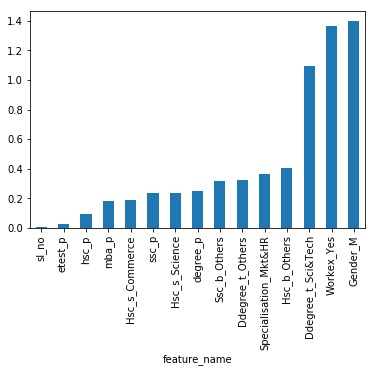

In [276]:
# use absolute value of coeff

df_lr_feature_importance1=pd.DataFrame() 

df_lr_feature_importance['feature_name'] = X.columns
df_lr_feature_importance['importance']=abs(importance)

df_lr_feature_importance.sort_values(by ='importance', ascending=False, inplace=True)
df_lr_feature_importance
df_lr_feature_importance.groupby('feature_name').importance.mean().sort_values().plot(kind='bar')

The top 5 important features influence a candidate in getting placed are:
1. Gender_M - interesting finding: female compare to male is more likely to be placed	
2. Workex_Yes - ppl have work experience are more likely to be placed
3. Ddegree_t_Sci&Tech - ppl with this degree are less likely to be placed compare to other degrees
4. Hsc_b_Others - Board of Education-Others is more likely to be placed than central board	
5. Specialisation_Mkt&HR - ppl with this specialisation are less likely to be placed compare to other specialisation

# weak points 
1. data could be more detailed:
for example there are only 3 unique values in degree_t, hsc_s, and 2 unique values in Hsc_b,ssc_b, and specialisation 

2. total data is not large enough, only 215 entries

3. missing too much salary values. we could further analysis what affect salary level.

